In [4]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [10]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [11]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape, train_target.shape)

(42, 1) (14, 1) (42,)


In [12]:
# 선형 회귀 구하기

lr = LinearRegression()

lr.fit(train_input, train_target)

lr.predict([[50]])

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


Text(0, 0.5, 'weight')

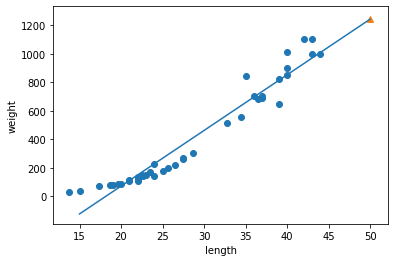

In [13]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

In [14]:
# 다항함수 만들기

# 2차함수추가

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [15]:
lr.fit(train_poly, train_target)

lr.predict([[50**2, 50]])

print('길이 제곱 a,b:', lr.coef_ ,'intercept :', lr.intercept_)

길이 제곱 a,b: [  1.01433211 -21.55792498] intercept : 116.05021078278259


In [17]:
point = np.arange(15,50)

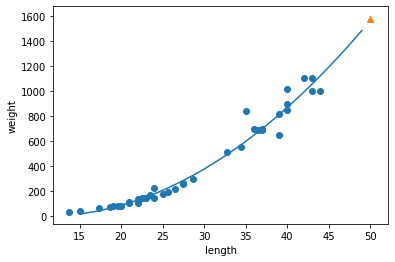

In [19]:
# train, input, target 변수 scatter
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50,1574 , marker='^')

#labeling
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
